In [1]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# import uniform distribution
from scipy.stats import uniform
from scipy.stats import norm
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC # "Support Vector Classifier"
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import linear_kernel as gramm_matrix
scaler = StandardScaler()

In [2]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)


In [3]:
# Generate 10 numbers from 0 to 10
n = 10000
a = 0
b = 1
data_uniform = uniform.rvs(size=n, loc = a, scale=b)
data_normal= norm.rvs(size=n, loc=10, scale=0.1)
uniform_labels = np.ones(n)*-1
normal_labels = np.ones(n)

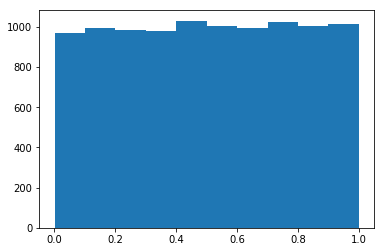

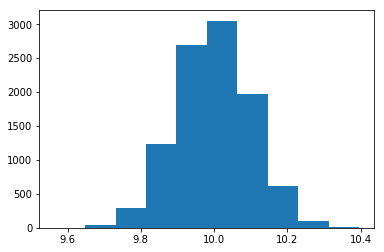

In [4]:
plt.hist(data_uniform)
plt.show()
plt.hist(data_normal)
plt.show()

In [5]:
minus_labels_features = pd.DataFrame({'features':data_uniform,'labels':uniform_labels})
plus_labels_features = pd.DataFrame({'features':data_normal,'labels':normal_labels})
all_dfs= [minus_labels_features, plus_labels_features]

df=pd.concat(all_dfs).reset_index(drop=True)

df_shuffled=shuffle(df)

In [6]:

X= np.asanyarray(df_shuffled['features']).reshape(-1,1)
y= np.asanyarray(df_shuffled['labels'])
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
#clf.fit(X_train, y_train)
classifier = SVC(kernel='linear', C=0.01)
fitd_clf=classifier.fit(X_train, y_train)
# Create a SVC classifier using an RBF kernel
rbf_classifier= SVC(kernel='rbf', random_state=0, gamma=1000, C=1000)
rbf_clf=rbf_classifier.fit(X_train, y_train)

In [18]:
rbf_clf

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1000, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
y_pred=fitd_clf.predict(X_test)
y_true= y_test
y_pred_rbf= rbf_clf.predict(X_test)

In [30]:
target_names = ['class 1', 'class 2']
print(classification_report(y_true, y_pred_rbf, target_names=target_names))

             precision    recall  f1-score   support

    class 1       1.00      1.00      1.00      3281
    class 2       1.00      1.00      1.00      3319

avg / total       1.00      1.00      1.00      6600



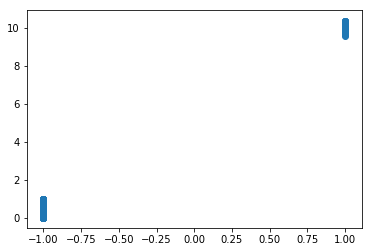

In [12]:
plt.scatter(df_shuffled['labels'],df_shuffled['features'])

In [15]:
pd.DataFrame(gramm_matrix(X_test, y_test.reshape(-1, 1)))

,0,1,2,3,4,5,6,7,8,9,...,6590,6591,6592,6593,6594,6595,6596,6597,6598,6599
0,0.998722,0.998722,-0.998722,-0.998722,-0.998722,0.998722,0.998722,-0.998722,-0.998722,0.998722,...,-0.998722,-0.998722,-0.998722,-0.998722,0.998722,0.998722,-0.998722,0.998722,0.998722,0.998722
1,1.008040,1.008040,-1.008040,-1.008040,-1.008040,1.008040,1.008040,-1.008040,-1.008040,1.008040,...,-1.008040,-1.008040,-1.008040,-1.008040,1.008040,1.008040,-1.008040,1.008040,1.008040,1.008040
2,-1.028218,-1.028218,1.028218,1.028218,1.028218,-1.028218,-1.028218,1.028218,1.028218,-1.028218,...,1.028218,1.028218,1.028218,1.028218,-1.028218,-1.028218,1.028218,-1.028218,-1.028218,-1.028218
3,-0.897045,-0.897045,0.897045,0.897045,0.897045,-0.897045,-0.897045,0.897045,0.897045,-0.897045,...,0.897045,0.897045,0.897045,0.897045,-0.897045,-0.897045,0.897045,-0.897045,-0.897045,-0.897045
4,-1.067727,-1.067727,1.067727,1.067727,1.067727,-1.067727,-1.067727,1.067727,1.067727,-1.067727,...,1.067727,1.067727,1.067727,1.067727,-1.067727,-1.067727,1.067727,-1.067727,-1.067727,-1.067727
5,0.951118,0.951118,-0.951118,-0.951118,-0.951118,0.951118,0.951118,-0.951118,-0.951118,0.951118,...,-0.951118,-0.951118,-0.951118,-0.951118,0.951118,0.951118,-0.951118,0.951118,0.951118,0.951118
6,1.006901,1.006901,-1.006901,-1.006901,-1.006901,1.006901,1.006901,-1.006901,-1.006901,1.006901,...,-1.006901,-1.006901,-1.006901,-1.006901,1.006901,1.006901,-1.006901,1.006901,1.006901,1.006901
7,-0.930599,-0.930599,0.930599,0.930599,0.930599,-0.930599,-0.930599,0.930599,0.930599,-0.930599,...,0.930599,0.930599,0.930599,0.930599,-0.930599,-0.930599,0.930599,-0.930599,-0.930599,-0.930599
8,-0.953541,-0.953541,0.953541,0.953541,0.953541,-0.953541,-0.953541,0.953541,0.953541,-0.953541,...,0.953541,0.953541,0.953541,0.953541,-0.953541,-0.953541,0.953541,-0.953541,-0.953541,-0.953541
9,1.050745,1.050745,-1.050745,-1.050745,-1.050745,1.050745,1.050745,-1.050745,-1.050745,1.050745,...,-1.050745,-1.050745,-1.050745,-1.050745,1.050745,1.050745,-1.050745,1.050745,1.050745,1.050745
